## Import packages

In [0]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import random
import matplotlib.pyplot as plt

import skimage as sk
from skimage import io
from skimage import feature
from skimage import filters
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray

from google.colab import files 
from google.colab import drive 

from PIL import Image
from math import sqrt

#WRITE CODE FOR IMAGES TO BE PULLED OFF GITHUB

## Link with your google drive and load in your image

In [48]:
# this links to your google drive 
drive.mount('/drive')

Mounted at /drive


In [0]:
my_path = '/content/drive/My Drive/Cellector/' #you should have a folder in your drive with this name where your files are stored

In [0]:
# PVN IMAGE
#img_pvn1 = Image.open('my_path') #Rutuja use this one
img = sk.io.imread('/drive/My Drive/Cellector/thalamus.png') #I changed this by cutting out Research folder this is for mac

In [0]:
# PVN IMAGE
#np_img_pvn = numpy.array(rgb_image)
image_gray = rgb2gray(img)

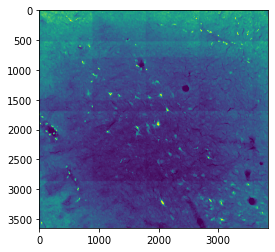

In [52]:
plt.imshow(image_gray)
#plt.imshow(image_gray)

## Find ALL of the blobs and label training data

/usr/local/lib/python3.6/dist-packages/skimage/feature/blob.py:125: RuntimeWarning: invalid value encountered in double_scalars
  r1 = blob1[-1] / blob2[-1]
/usr/local/lib/python3.6/dist-packages/skimage/feature/blob.py:126: RuntimeWarning: divide by zero encountered in true_divide
  pos1 = blob1[:ndim] / (max_sigma * root_ndim)
/usr/local/lib/python3.6/dist-packages/skimage/feature/blob.py:127: RuntimeWarning: divide by zero encountered in true_divide
  pos2 = blob2[:ndim] / (max_sigma * root_ndim)
/usr/local/lib/python3.6/dist-packages/skimage/feature/blob.py:129: RuntimeWarning: invalid value encountered in subtract
  d = np.sqrt(np.sum((pos2 - pos1)**2))


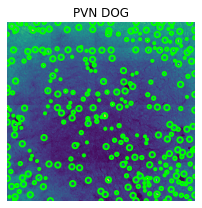

In [53]:
#SAMPLE IMAGE

# Compute radii in the 3rd column.
#blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)
#threshold=.1
"""
blobs_log_pvn = blob_log(image_gray, min_sigma=15, max_sigma=50, num_sigma=10, threshold=.1)
blobs_log_pvn[:, 2] = blobs_log_pvn[:, 2] * sqrt(2)

blobs_dog_pvn = blob_dog(image_gray, min_sigma=15, max_sigma=50, threshold=.1)
blobs_dog_pvn[:, 2] = blobs_dog_pvn[:, 2] * sqrt(2)

blobs_doh_pvn = blob_doh(image_gray, min_sigma=15, max_sigma=50, threshold=.1)
blobs_doh_pvn[:, 2] = blobs_doh_pvn[:, 2] * sqrt(2)

blobs_list = [blobs_log_pvn, blobs_dog_pvn, blobs_doh_pvn]
colors = ['lime', 'lime', 'lime']
titles = ['PVN LOG', 'PVN DOG', 'PVN DOH']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(image_gray)
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()
"""
blobs_dog_pvn = blob_dog(image_gray, min_sigma=15, max_sigma=50, threshold=.1)
blobs_dog_pvn[:, 2] = blobs_dog_pvn[:, 2] * sqrt(2)

blobs_list = [blobs_dog_pvn]
colors = ['lime']
titles = ['PVN DOG']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 1, figsize=(9, 3), sharex=True, sharey=True)
#ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    axes.set_title(title)
    axes.imshow(image_gray)
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        axes.add_patch(c)
    axes.set_axis_off()

plt.tight_layout()
plt.show()






# REFINE THIS SO IT'S just blobs dog


# IGNORE IT AND STORE IT (EDGE AND CORNER CASES)

In [54]:
len(blobs_dog_pvn)

315

In [0]:
# This section of code finds all the blobs and puts a 70x70 pixel square around them 
# then stores them in a list 

bounding_box_list = []
edge_bounding_box_list = []

for blob in blobs_dog_pvn:
  x, y, r, = blob 
  y = int(y.round(0))
  x = int(x.round(0))
  maxx, maxy = image_gray.shape
  maxx-=1
  maxy-=1 #0-indexing
  left_bound = x-70
  right_bound = x+70
  upper_bound = y+70
  lower_bound = y-70
  """
  if x < 70:
    left_bound = 0
    right_bound = 140-x
  if x > maxx-70:
    right_bound = maxx
    left_bound = 140 - (maxx-x)
  if y < 70:
    lower_bound = 0
    upper_bound = 140-y
  if y > maxy-70:
    lower_bound = maxy
    upper_bound = 140 - (maxy-y)
"""
  bounding_box = image_gray[left_bound:right_bound,lower_bound:upper_bound]
  #temp solution to the images not being the same size
  if(len(bounding_box) != 140):
    edge_bounding_box_list.append(bounding_box)
    continue;
  if(len(bounding_box[0]) != 140):
    edge_bounding_box_list.append(bounding_box)
    continue;
  bounding_box_list.append(bounding_box) 


(140, 140)

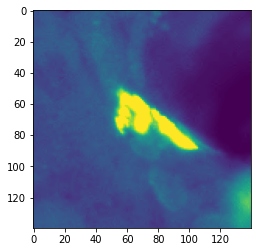

In [56]:
# let's grab one cell as an example
plt.imshow(bounding_box_list[190])
bounding_box_list[190].shape

In [0]:
# we need a training set, so let's grab random items from the entire blob list 

training_images = random.sample(bounding_box_list,10)




In [0]:
test_images = random.sample(bounding_box_list,10) #can take out the images you used for training by using "not in"

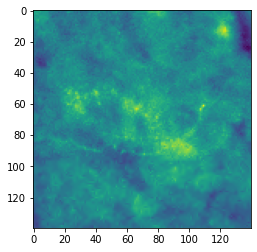

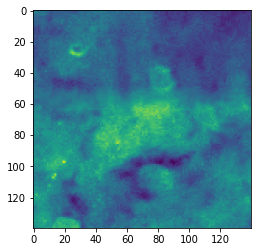

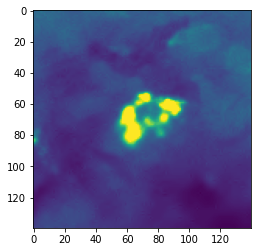

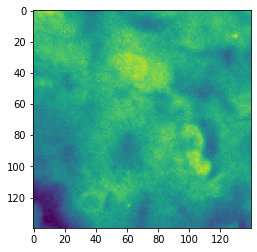

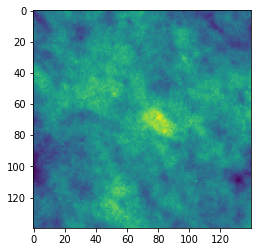

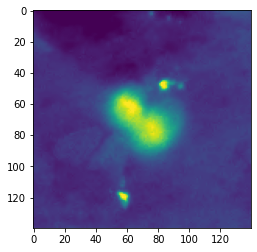

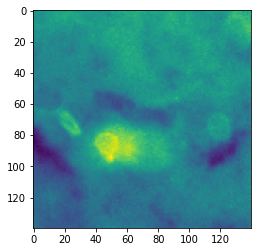

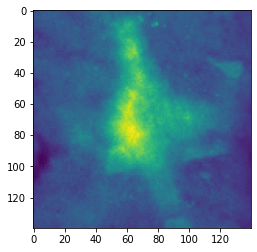

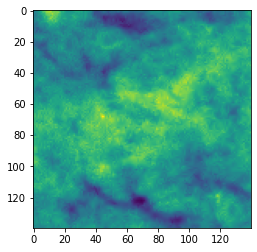

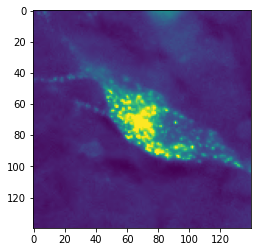

In [59]:
# now we need to label our training data, press 'c' for cell, or any other key for other.

# matplob inline DOESNT WORK in colaboratory (of course), so this needs to be downloaded and run as ipynb I think... 
# in order to include the user input 

%matplotlib inline

training_labels = []


def press(event):
    global keypress
    global vals
        
    if event.key == 'c':
        training_labels.append('cell')
    else: 
        training_labels.append('other')
    

    if len(training_labels) == 2:
        fig.canvas.mpl_disconnect(cid)

    return training_labels


for blobss in range(10):
    
    fig = plt.figure()
    plt.imshow(training_images[blobss])
    cid = fig.canvas.mpl_connect('key_press_event', press)


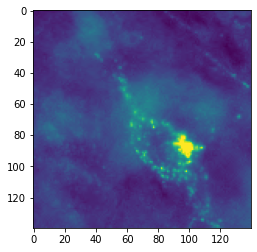

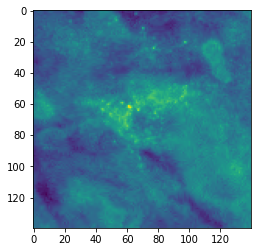

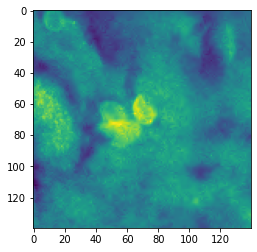

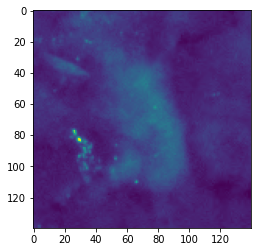

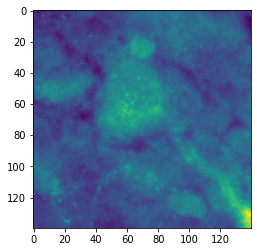

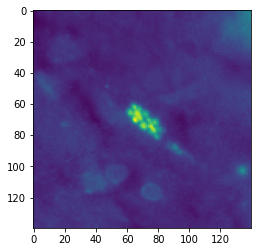

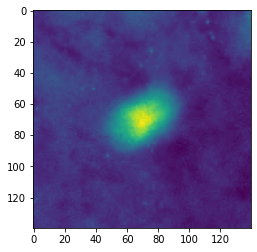

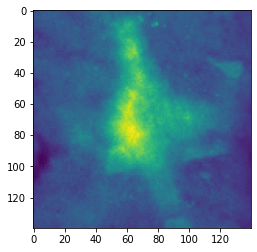

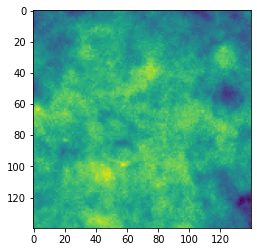

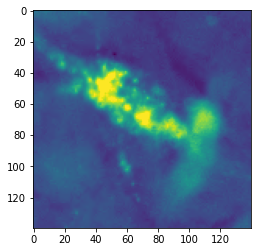

In [60]:
# SAME PROCESS EXCEPT FOR TESTING DATA

%matplotlib inline

testing_labels = []


def press(event):
    global keypress
    global vals
        
    if event.key == 'c':
        testing_labels.append('cell')
    else: 
        testing_labels.append('other')
    

    if len(testing_labels) == 2:
        fig.canvas.mpl_disconnect(cid)

    return testing_labels


for blobss in range(10):
    
    fig = plt.figure()
    plt.imshow(test_images[blobss])
    cid = fig.canvas.mpl_connect('key_press_event', press)

In [0]:

#for blobss in range(8):
    
#    fig = plt.figure()
#    plt.imshow(test_images[blobss])

In [62]:
# let's check our labels
training_labels = np.array([2,2,0,0,1,2,0,1,1,2])
testing_labels = np.array([0,2,0,1,1,0,1,0,0,0])

print(len(test_images))               
print(len(training_images))
print(len(training_labels))
print(len(testing_labels))

10
10
10
10


What categories do we want to use?? 0 = ___cell__, 1= ?, etc..

**Accuracy**

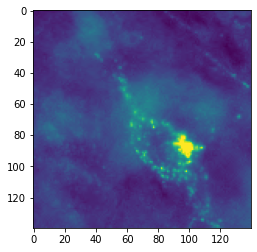

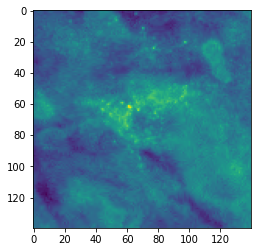

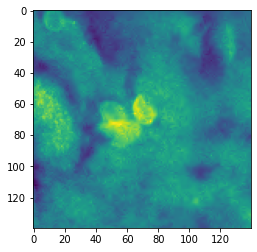

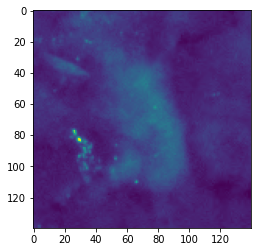

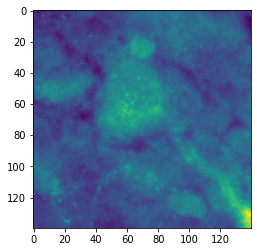

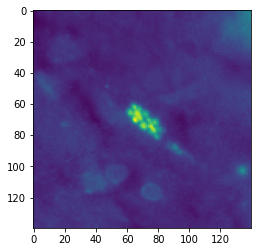

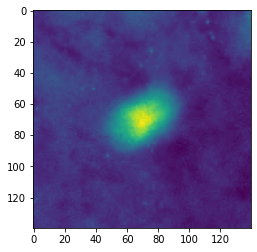

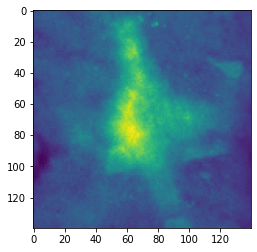

In [63]:
#Convert data to excel sheet
for blobss in range(8):
    
    fig = plt.figure()
    plt.imshow(test_images[blobss])

In [64]:
pip install xlsxwriter

Create an excel sheet:




column 1: image array



column 2: result (cell, not cell)

In [65]:
# import drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [0]:
from openpyxl import Workbook
wb = Workbook()
test_filename = 'test_workbook.xlsx'

wb.save('/content/drive/My Drive/'+test_filename)

from openpyxl import load_workbook
wb = load_workbook('/content/drive/My Drive/'+test_filename)

In [67]:
import xlwt 
from xlwt import Workbook 

#wb = Workbook() 
  
sheet1 = wb

sheet1.write(1, 0, 'A') 
sheet1.write(2, 0, 'B') 
sheet1.write(3, 0, 'C') 
sheet1.write(4, 0, 'D') 

  
wb.save('test_workbook.xlsx') 

AttributeError: ignored

How to calculate accuracy

In [0]:
#Say Data size = 100
#Get the X and Y for all the data

#Step 1: Divide the data into say 10 subsets 

#Step 2:
#test data as first subset
#Remaining data as train data

#Step 3: Find the difference between actual value and the predicted value for each row in test data

#Step 4: this for all subsets and find the accuracy for each subset


In [0]:
X = list(range(1, 100))
n_subsets = 3
##################### Create N Subsets #####################

import more_itertools 

num_rows_data = list(range(1, 100))
list_sub = []
list_sub_begin = []
list_sub_end = []

#divides or groups indices of the data into N subsets
for sub in more_itertools.divide(n_subsets, num_rows_data):
    list_sub = list_sub + [list(sub)]

#Store the divided indices as starting indices of subset and ending indices of subset
for i in range(0, len(list_sub)):
    list_sub_begin = list_sub_begin + [list_sub[i][0]]
    list_sub_end = list_sub_end + [list_sub[i][len(list_sub[i])-1] + 1]

#creating subsets
X_subsets = []
Y_subsets = []  
for i in range(0, n_subsets):
    X_subsets = X_subsets + [X.iloc[list_sub_begin[i]: list_sub_end[i], :]]
    Y_subsets = Y_subsets + [Y[list_sub_begin[i]: list_sub_end[i]]]
  
  ##################### Create N Subsets #####################


In [0]:
 ################## Splitting train and test data #################
#Considered 1 subset as testing data
#And remaining data as training data

rows = list(range(X_subsets[0], Y_subsets[0]))

test = pd.DataFrame()
train = pd.DataFrame()
for i in range(0, len(mydata)):
    if(i in rows):
      row_test = pd.DataFrame([mydata.iloc[i, :]])
      test = pd.concat([row_test, test], ignore_index=True)
    else:
      row_train = pd.DataFrame([mydata.iloc[i, :]])
      train = pd.concat([row_train, train], ignore_index=True)

In [0]:
#Finding accuracy of testing data prediction
#Go through each test data and subtract the predicted value to the actual value

#ypred is a list of predicted values of rows in test data
#yactual is a list of actual values of rows in test data

#function return the difference between the predicted and actual value
#if differen

def findDiference(ypreds,yactual):
  difference = abs(ypreds-yactual)
  return difference

*italicized text*

In [0]:
#newt = test_images[3] + np.zeros((71,140),dtype=float) might have to do something like this to fix when bounding boxes are on edges

## Begin keras code

In [0]:

train_images = np.stack(training_images, axis=0 )
test_images = np.stack(test_images, axis = 0)

train_labels = np.array(training_labels)
test_labels = np.array(testing_labels)

#train_labels = np.array(training_labels, axis=0)
#test_labels = np.array(testing_labels, axis=0)

In [71]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
training_images[0].shape

(140, 140)

In [0]:
class_names = ['cell','bv','other']

In [74]:
# explore data
test_images.shape

(10, 140, 140)

In [0]:

# need to set pixel values to a 0-1 scale
train_images = train_images / 255.0

test_images = test_images / 255.0

In [0]:
#Load a previously saved model
#checkpoint_path will be a path to the checkpoint from the current directory, ie 'training_test/cp.ckpt'
def load_weights(model,checkpoint_path):
  model.load_weights(checkpoint_path)

In [0]:
#Build model(if model has not already been built/fitted)
def build_model():
  # Need to build the model, why 128??
  model = keras.Sequential([
      keras.layers.Flatten(input_shape=(140, 140)),
      keras.layers.Dense(128, activation='relu'), # WHAT OTHER LAYERS SHOULD WE BE ADDING??
      keras.layers.Dropout(0.5),
      keras.layers.Dense(3)
  ])
  model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
  return model

In [0]:
#Add training data to model
#Params: 
#model: the model to add to
#checkpoint_path: user defined path in case we would like to revert to this version
#training_images: training images
#training_labels: training labels
#epochs: number of epochs to use
def add_to_model(model, checkpoint_path, training_images, training_labels, num_epochs):
  cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)
  model.fit(training_images, 
          training_labels,  
          epochs=num_epochs,
          callbacks=[cp_callback]) 
  

In [80]:
 
 # Proof-of-Concept
 # Need to build the model, why 128??
model = keras.Sequential([
      keras.layers.Flatten(input_shape=(140, 140)),
      keras.layers.Dense(128, activation='relu'),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(3)
  ])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(training_images, 
          training_labels,  
          epochs=300) #might lead to overfitting if training data is small


  

ValueError: ignored

In [0]:
# make predictions 

probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

In [0]:
predictions[0]

In [0]:
np.argmax(predictions[0]) #try a prediction out [notice how test labels are not involved]

In [0]:
test_labels[0] #try a prediction out [notice how test labels are not involved]

## Plot keras results

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(1))
  plt.yticks([])
  thisplot = plt.bar(range(1), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [0]:
#https://www.tensorflow.org/tutorials/keras/classification
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 7
num_cols = 1
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()